<a href="https://colab.research.google.com/github/Zazbabe/Data-Science-For-Business/blob/main/Sandras_kopia_av_Operations_Department_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset 
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify training data directory
X_Ray_Directory = '/content/drive/My Drive/Colab Notebooks/Chest_X_Ray/Dataset'

In [4]:
# List the folders in the directory
os.listdir(X_Ray_Directory)

['2', '0', '3', '1']

In [5]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation  
image_generator = ImageDataGenerator(rescale= 1./255, validation_split= 0.2)

In [6]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

# hämtar 40 bilder från X_Ray_Directory där bilderna ligger, och blandar ordningen på bilderna för att modellen inte ska lära sig ordningen på bilderna
train_generator = image_generator.flow_from_directory(batch_size= 40, directory= X_Ray_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset= 'training')

Found 428 images belonging to 4 classes.


In [7]:
validation_generator = image_generator.flow_from_directory(batch_size= 40, directory= X_Ray_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset= 'validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generate a batch of 40 images and labels
train_images, train_labels = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels.shape

(40, 4)

In [11]:
train_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]],

In [12]:
# labels Translator 
label_names = {0: 'Covid-19', 1: 'Healthy', 2: 'Viral Pneumonia', 3: 'Bacterial Pneumonia'}

In [13]:
label_names

{0: 'Covid-19', 1: 'Healthy', 2: 'Viral Pneumonia', 3: 'Bacterial Pneumonia'}

# TASK #3: VISUALIZE DATASET

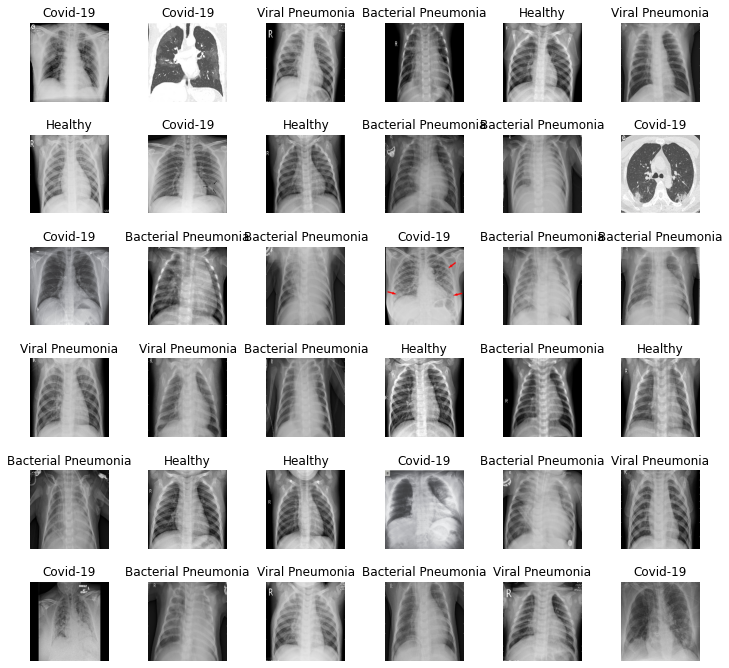

In [14]:
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize= (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(train_images[i])
  axes[i].set_title(label_names[np.argmax(train_labels[i])])
  axes[i].axis('off')

plt.subplots_adjust(wspace= 0.5)

# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

![alt text](https://drive.google.com/uc?id=1hngDlUf9JnwUhPII-Ah7KTtcvoeTI9m8)

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# TASK #6: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [15]:
# importerar ResNet50 som redan är färdigtränad och lägger på datasetet imagenet som redan har tränat det vi vill använda
basemodel = ResNet50(weights= 'imagenet', include_top= False, input_tensor=Input(shape= (256, 256, 3)))

94773248/94765736 [==============================] - 0s 0us/step


In [16]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
# freezing layers in the model (de 10 sista lagren)
for layer in basemodel.layers[:-10]:
  layers.trainable = False

# TASK #7: BUILD AND TRAIN DEEP LEARNING MODEL

In [18]:
# lägger på olika lager för att bygga modellen
# bygger en "AI-hjärna", dvs lägger på de lager jag vill och skapar den justering i modellen som jag vill ha
# dropout tar bort en del för att undvika overfitting

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size= (4,4))(headmodel)
headmodel = Flatten (name= 'flatten') (headmodel)
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation= 'softmax')(headmodel)

In [19]:
model = Model(inputs= basemodel.input, outputs= headmodel)

In [20]:
# kompilerar modellen
model.compile(loss= 'categorical_crossentropy', optimizer= optimizers.RMSprop(lr= 1e-4), metrics= ['accuracy'])

In [21]:
# vill undvika overfitting genom early stopping 

# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)
earlystopping = EarlyStopping(monitor= 'val_loss', mode='min', patience= 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath= 'weights.hdf5', verbose= 1, save_best_only= True)

In [22]:
train_generator = image_generator.flow_from_directory(batch_size= 4, directory=X_Ray_Directory, shuffle= True, target_size= (256, 256), class_mode= 'categorical', subset= 'training')
validation_generator = image_generator.flow_from_directory(batch_size= 4, directory=X_Ray_Directory, shuffle= True, target_size= (256, 256), class_mode= 'categorical', subset= 'validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [24]:
history = model.fit_generator(train_generator, epochs= 25, validation_data= validation_generator, callbacks= [checkpointer, earlystopping])

Epoch 1/5
107/107 [==============================] - ETA: 0s - loss: 0.5284 - accuracy: 0.8341
Epoch 00001: val_loss did not improve from 8.29924
107/107 [==============================] - 379s 4s/step - loss: 0.5284 - accuracy: 0.8341 - val_loss: 10.9941 - val_accuracy: 0.2500
Epoch 2/5
107/107 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.9112
Epoch 00002: val_loss did not improve from 8.29924
107/107 [==============================] - 377s 4s/step - loss: 0.3117 - accuracy: 0.9112 - val_loss: 12.3459 - val_accuracy: 0.2500
Epoch 3/5
107/107 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.9229
Epoch 00003: val_loss did not improve from 8.29924
107/107 [==============================] - 381s 4s/step - loss: 0.2309 - accuracy: 0.9229 - val_loss: 72.7038 - val_accuracy: 0.2500
Epoch 4/5
107/107 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9626
Epoch 00004: val_loss did not improve from 8.29924
107/107 [========

# TASK #8: EVALUATE TRAINED DEEP LEARNING MODEL

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training accuracy and loss')

In [ ]:
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation loss')

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')

In [ ]:
test_directory = '/content/drive/My Drive/Colab Notebooks/Chest_X_Ray/Test'

In [ ]:
test_gen = ImageDataGenerator(rescale= 1./255)
test_generator = test_gen.flow_from_directory(batch_size= 40, directory= test_directory, shuffle= True, target_size= (256,256), class_mode= 'categorical')
evaluate = model.evaluate_generator(test_generator, steps= test_generator.n //4, verbose=1)
print('Accuracy Test: {}'.format(evaluate[1]))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    img = cv2.imread(os.path.join(test_directory, str(i),item))
    img = cv2.resize(img, (256,256))
    image.append(img)
    img = img / 256
    img = img.reshape(-1, 256, 256, 3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

In [ ]:
score = accuracy_score(original, prediction)
print('Test accuracy: {}'.format(score))

In [ ]:
L = 5
W = 5

fig, axes= plt.subplots(L, W, figsize= (12,12))
axes= axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(image[i])
  axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
  axes[i].axis('off')

plt.subplots_adjust(wspace= 1.2)

In [ ]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

In [ ]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot= True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion Matrix')

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS